### Task 2

In [29]:
import os
import requests
from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
# dataset URL
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
#target directory to save the downloaded dataset
target_dir = "sonar_dataset"

# Download the dataset
response = requests.get(dataset_url)
dataset_file_path = os.path.join(target_dir, "sonar.all-data.csv")

with open(dataset_file_path, 'wb') as f:
    f.write(response.content)

# Load the dataset 
df = pd.read_csv(dataset_file_path, header=None)
print(df)

# Substitute 'M' and 'R' with integers
label_encoder = LabelEncoder()
df.iloc[:, -1] = label_encoder.fit_transform(df.iloc[:, -1])

# Display the updated DataFrame
print(df.head())

# Split the dataset into features (X) and target (y)
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Display the updated DataFrame
print(df.head())

# Check the data types of y
print("Data type of y:", y.dtype)

# Convert y to integer type if needed
y = y.astype(int)

# Check the data types again
print("Data type of y:", y.dtype)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      52      53      54   

In [31]:
# Define the model
rf_model = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'n_estimators': 100}


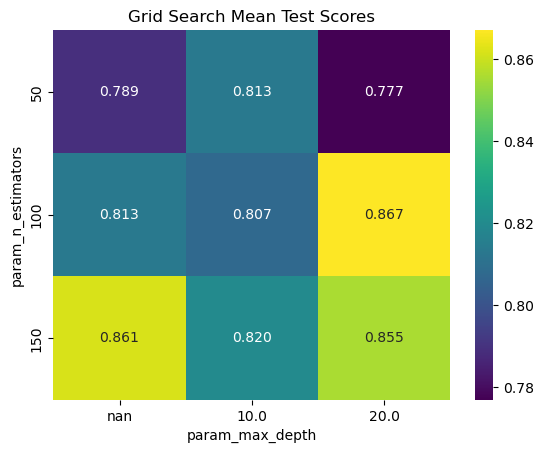

In [32]:
# Plot a heatmap of parameters
results = pd.DataFrame(grid_search.cv_results_)
heatmap_data = results.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_score')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Mean Test Scores')
plt.show()

### Comments:
The heatmap is a useful tool for hyperparameter tuning, providing insights into how different combinations affect the model's performance.The best parameters, as identified by the grid search are 0.867{max_depth': 20, 'n_estimators': 100}. This means that the model performed optimally when the maximum depth of the trees (max_depth) is unrestricted (None) and the number of trees in the forest (n_estimators) is set to 100.

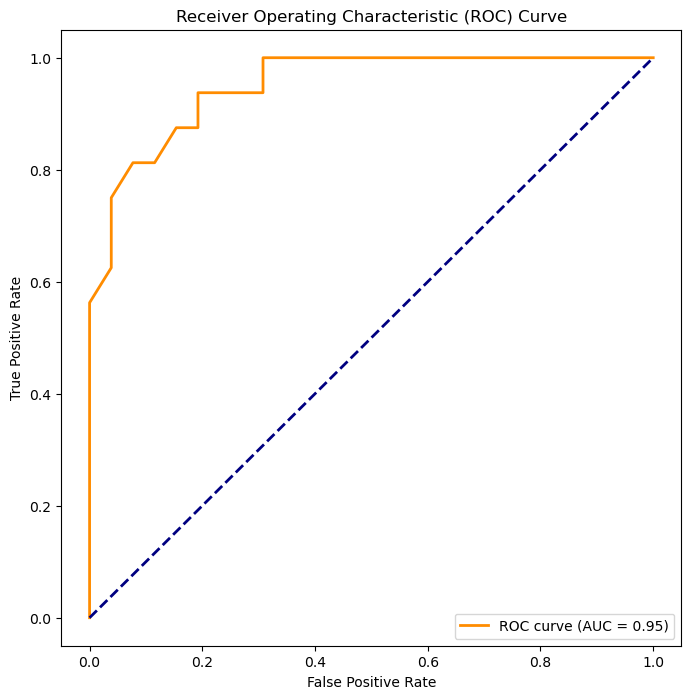

In [33]:
# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Plot ROC curve
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Comments:
The ROC curve and AUC value 0.95 suggest that the Random Forest model, with the n_estimators and max_depth parameters, is effective in discriminating between mines and rocks in the dataset, and it has a high level of accuracy in its predictions